In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

## Use multiple imputation method, MICE in Python (random forest) 
## https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b
## Use function to change entire csv to upper case to ensure consistency (can be done at the end)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [72]:
## Glucose

glucose_file = "/home/ec2-user/SageMaker/Team-5/data_processing/GlucResult.csv"
gluc = pd.read_csv(glucose_file)  

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
display(gluc)

print("----------------------UNIQUE UNITS------------------------")
for column in gluc.columns:
    if "Unit" in column:
        unique_values = gluc[column].unique()
        print(f"\nUnique units in column '{column}':")
        print(unique_values)

## Column 'PlasmaGlucoseUnits' contains 'Male' and 'Female' labels, creating new 'Gender' column and moving labels there
gluc['Gender'] = None
gluc.loc[gluc['PlasmaGlucoseUnits'] == 'Male', 'Gender'] = 'Male'
gluc.loc[gluc['PlasmaGlucoseUnits'] == 'Female', 'Gender'] = 'Female'
gender_column = 'PlasmaGlucoseUnits'
gluc[gender_column] = gluc[gender_column].replace('Male', np.nan)
gluc[gender_column] = gluc[gender_column].replace('Female', np.nan)

###########################################################################

gluc = gluc.astype(str)

gluc['Result_Units1_1'] = gluc['Result1_1'] + gluc['Units1_1']
gluc['Result_Units2_1'] = gluc['Result2_1'] + gluc['Units2_1']
gluc['Result_Units3_1'] = gluc['Result3_1'] + gluc['Units3_1']
gluc['Result_Units4_1'] = gluc['Result4_1'] + gluc['Units4_1']
gluc['Result_Units5_1'] = gluc['Result5_1'] + gluc['Units5_1']
gluc['Result_Units6_1'] = gluc['Result6_1'] + gluc['Units6_1']
gluc['Result_Units7_1'] = gluc['Result7_1'] + gluc['Units7_1']
gluc['Result_Units8_1'] = gluc['Result8_1'] + gluc['Units8_1']
gluc['Result_Units9_1'] = gluc['Result9_1'] + gluc['Units9_1']
gluc['Result_Units10_1'] = gluc['Result10_1'] + gluc['Units10_1']

gluc['D1FastingPlasmaGlucResult_Units1'] = gluc['D1FastingPlasmaGlucResult1_1'] + gluc['D1FastingPlasmaGlucUnits1_1']
gluc['D1FastingPlasmaGlucResult_Units2'] = gluc['D1FastingPlasmaGlucResult2_1'] + gluc['D1FastingPlasmaGlucUnits2_1']
gluc['D1FastingPlasmaGlucResult_Units3'] = gluc['D1FastingPlasmaGlucResult3_1'] + gluc['D1FastingPlasmaGlucUnits3_1']

gluc['D2aOGTTFastingGlucResult_Units1'] = gluc['D2aOGTTFastingGlucResult1_1'] + gluc['D2aOGTTFastingGlucUnits1_1']
gluc['D2aOGTTFastingGlucResult_Units2'] = gluc['D2aOGTTFastingGlucResult2_1'] + gluc['D2aOGTTFastingGlucUnits2_1']

gluc['D2b2HourGlucResult_Units1'] = gluc['D2b2HourGlucResult1_1'] + gluc['D2b2HourGlucUnits1_1']
gluc['D2b2HourGlucResult_Units2'] = gluc['D2b2HourGlucResult2_1'] + gluc['D2b2HourGlucUnits2_1']
gluc['D2b2HourGlucResult_Units3'] = gluc['D2b2HourGlucResult3_1'] + gluc['D2b2HourGlucUnits3_1']

gluc['D3RandomPlasmaGlucResult_Units1'] = gluc['D3RandomPlasmaGlucResult1_1'] + gluc['D3RandomPlasmaGlucUnits1_1']
gluc['D3RandomPlasmaGlucResult_Units2'] = gluc['D3RandomPlasmaGlucResult2_1'] + gluc['D3RandomPlasmaGlucUnits2_1']
gluc['D3RandomPlasmaGlucResult_Units3'] = gluc['D3RandomPlasmaGlucResult3_1'] + gluc['D3RandomPlasmaGlucUnits3_1']
gluc['D3RandomPlasmaGlucResult_Units4'] = gluc['D3RandomPlasmaGlucResult4_1'] + gluc['D3RandomPlasmaGlucUnits4_1']
gluc['D3RandomPlasmaGlucResult_Units5'] = gluc['D3RandomPlasmaGlucResult5_1'] + gluc['D3RandomPlasmaGlucUnits5_1']

gluc['D2aFastingPlasmaGlucResult_Unit3'] = gluc['D2aFastingPlasmaGlucResult3_1'] + gluc['D2aFastingPlasmaGlucUnits3_1']

del gluc['D1FastingPlasmaGlucResult1_1']
del gluc['D1FastingPlasmaGlucUnits1_1']
del gluc['D1FastingPlasmaGlucResult2_1']
del gluc['D1FastingPlasmaGlucUnits2_1']
del gluc['D1FastingPlasmaGlucResult3_1']
del gluc['D1FastingPlasmaGlucUnits3_1']
del gluc['D2aOGTTFastingGlucResult1_1']
del gluc['D2aOGTTFastingGlucUnits1_1']
del gluc['D2aOGTTFastingGlucResult2_1']
del gluc['D2aOGTTFastingGlucUnits2_1']
del gluc['D2b2HourGlucResult1_1']
del gluc['D2b2HourGlucUnits1_1']
del gluc['D2b2HourGlucResult2_1']
del gluc['D2b2HourGlucUnits2_1']
del gluc['D2b2HourGlucResult3_1']
del gluc['D2b2HourGlucUnits3_1']
del gluc['D3RandomPlasmaGlucResult1_1']
del gluc['D3RandomPlasmaGlucUnits1_1']
del gluc['D3RandomPlasmaGlucResult2_1']
del gluc['D3RandomPlasmaGlucUnits2_1']
del gluc['D3RandomPlasmaGlucResult3_1']
del gluc['D3RandomPlasmaGlucUnits3_1']
del gluc['D3RandomPlasmaGlucResult4_1']
del gluc['D3RandomPlasmaGlucUnits4_1']
del gluc['D3RandomPlasmaGlucResult5_1']
del gluc['D3RandomPlasmaGlucUnits5_1']
del gluc['D2aFastingPlasmaGlucResult3_1']
del gluc['D2aFastingPlasmaGlucUnits3_1']
del gluc['Result1_1']
del gluc['Units1_1']
del gluc['Result2_1']
del gluc['Units2_1']
del gluc['Result3_1']
del gluc['Units3_1']
del gluc['Result4_1']
del gluc['Units4_1']
del gluc['Result5_1']
del gluc['Units5_1']
del gluc['Result6_1']
del gluc['Units6_1']
del gluc['Result7_1']
del gluc['Units7_1']
del gluc['Result8_1']
del gluc['Units8_1']
del gluc['Result9_1']
del gluc['Units9_1']
del gluc['Result10_1']
del gluc['Units10_1']

###########################################################################
    
for col in gluc.columns:
    try:
        cond1 = gluc[col].str.contains('mg/dl')
        gluc[col+'_mg/dl'] = gluc.loc[cond1, col]
    except:
        pass
    
for col in gluc.columns:
    try:
        cond2 = gluc[col].str.contains('mmol/L')
        gluc[col+'_mmol/L'] = gluc.loc[cond2, col]
    except:
        pass

###########################################################################
for col in gluc.columns:
    try:
        cond1 = gluc[col].str.contains('mg/dl')
        gluc[col+'_mg/dl'] = gluc[col+'_mg/dl'].str[:-5]
    except:
        pass
    
for col in gluc.columns:
    try:
        cond2 = gluc[col].str.contains('mmol/L')
        gluc[col+'_mmol/L'] = gluc[col+'_mmol/L'].str[:-6]
    except:
        pass
###########################################################################
for col in gluc.columns:
    try:
        gluc[col+'_mg/dl'] = pd.to_numeric(gluc[col+'_mg/dl'], errors='coerce')
    except:
        pass
    
for col in gluc.columns:
    try:
        gluc[col+'_mmol/L'] = pd.to_numeric(gluc[col+'_mmol/L'], errors='coerce')
    except:
        pass
###########################################################################
for col in gluc.columns:
    try:
        gluc[col+'_mmol/L_to_mg/dl'] = gluc[col+'_mg/dl'] * 18.018
    except:
        pass
    
gluc['Res1_mg/dl'] = gluc['Result_Units1_1_mg/dl'].fillna(gluc['Result_Units1_1_mmol/L_to_mg/dl'])
gluc['Res2_mg/dl'] = gluc['Result_Units2_1_mg/dl'].fillna(gluc['Result_Units2_1_mmol/L_to_mg/dl'])
gluc['Res3_mg/dl'] = gluc['Result_Units3_1_mg/dl'].fillna(gluc['Result_Units3_1_mmol/L_to_mg/dl'])
gluc['Res4_mg/dl'] = gluc['Result_Units4_1_mg/dl'].fillna(gluc['Result_Units4_1_mmol/L_to_mg/dl'])
gluc['Res5_mg/dl'] = gluc['Result_Units5_1_mg/dl'].fillna(gluc['Result_Units5_1_mmol/L_to_mg/dl'])
gluc['Res6_mg/dl'] = gluc['Result_Units6_1_mg/dl'].fillna(gluc['Result_Units6_1_mmol/L_to_mg/dl'])
gluc['Res7_mg/dl'] = gluc['Result_Units7_1_mg/dl'].fillna(gluc['Result_Units7_1_mmol/L_to_mg/dl'])
gluc['Res8_mg/dl'] = gluc['Result_Units8_1_mg/dl'].fillna(gluc['Result_Units8_1_mmol/L_to_mg/dl'])
gluc['Res9_mg/dl'] = gluc['Result_Units9_1_mg/dl'].fillna(gluc['Result_Units9_1_mmol/L_to_mg/dl'])
gluc['Res10_mg/dl'] = gluc['Result_Units10_1_mg/dl'].fillna(gluc['Result_Units10_1_mmol/L_to_mg/dl'])
    
gluc['D1FastingPlasmaGluc1_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units1_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D1FastingPlasmaGluc2_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units2_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D1FastingPlasmaGluc3_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units3_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units3_mmol/L_to_mg/dl'])

gluc['D2aOGTTFastingGluc1_mg/dl'] = gluc['D2aOGTTFastingGlucResult_Units1_mg/dl'].fillna(gluc['D2aOGTTFastingGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D2aOGTTFastingGluc2_mg/dl'] = gluc['D2aOGTTFastingGlucResult_Units2_mg/dl'].fillna(gluc['D2aOGTTFastingGlucResult_Units2_mmol/L_to_mg/dl'])

gluc['D2b2HourGluc1_mg/dl'] = gluc['D2b2HourGlucResult_Units1_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D2b2HourGluc2_mg/dl'] = gluc['D2b2HourGlucResult_Units2_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D2b2HourGluc3_mg/dl'] = gluc['D2b2HourGlucResult_Units3_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units3_mmol/L_to_mg/dl'])

gluc['D3RandomPlasmaGluc1_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units1_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc2_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units2_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc3_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units3_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units3_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc4_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units4_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units4_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc5_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units5_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units5_mmol/L_to_mg/dl'])

gluc['D2aFastingPlasmaGluc3_mg/dl'] = gluc['D2aFastingPlasmaGlucResult_Unit3_mg/dl'].fillna(gluc['D2aFastingPlasmaGlucResult_Unit3_mmol/L_to_mg/dl'])

## Formatting column data types
for column in gluc.columns:
    if "Type" in column:
        gluc[column] = gluc[column].astype(str)
for column in gluc.columns:
    if "Type" not in column:
        gluc[column] = pd.to_numeric(gluc[column], errors='coerce')

## Dropping columns used in formatting data
columns_to_keep = [col for col in gluc.columns if "mmol/L" not in col]
gluc = gluc[columns_to_keep]

## Adjusting mmol/L to mg/dl
for col in gluc.columns:
    if 'Reference' in col:
        gluc[col] = gluc[col].astype(float)

def multiply_conditionally(value):
    if isinstance(value, (int, float)) and value < 32:
        return value * 18.018
    else:
        return value

reference_columns = [col for col in gluc.columns if 'Reference' in col]
gluc[reference_columns] = gluc[reference_columns].applymap(multiply_conditionally)
        
## Dropping uuneeded columns and columns with all NAs, can be undone by removing this line
gluc.drop([col for col in gluc.columns if 'Result' in col],axis=1,inplace=True)
gluc = gluc.dropna(axis=1, how='all')

###########################################################################
gluc = gluc.round(decimals=0)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
display(gluc)
###########################################################################
gluc.to_csv('Glucose_clean.csv', index=False)

,PlasmaGlucoseResult,PlasmaGlucoseUnits,Result1_1,Units1_1,LowerReferenceRange1_1,HigherReferenceRange1_1,GlucoseType1_1,Result2_1,Units2_1,LowerReferenceRange2_1,HigherReferenceRange2_1,GlucoseType2_1,Result3_1,Units3_1,LowerReferenceRange3_1,HigherReferenceRange3_1,GlucoseType3_1,Result4_1,Units4_1,LowerReferenceRange4_1,HigherReferenceRange4_1,GlucoseType4_1,Result5_1,Units5_1,LowerReferenceRange5_1,HigherReferenceRange5_1,GlucoseType5_1,Result6_1,Units6_1,LowerReferenceRange6_1,HigherReferenceRange6_1,GlucoseType6_1,Result7_1,Units7_1,LowerReferenceRange7_1,HigherReferenceRange7_1,GlucoseType7_1,Result8_1,Units8_1,LowerReferenceRange8_1,HigherReferenceRange8_1,GlucoseType8_1,Result9_1,Units9_1,LowerReferenceRange9_1,HigherReferenceRange9_1,GlucoseType9_1,Result10_1,Units10_1,GlucoseType10_1,D1FastingPlasmaGlucResult1_1,D1FastingPlasmaGlucUnits1_1,D1FastingPlasmaGlucResult2_1,D1FastingPlasmaGlucUnits2_1,D1FastingPlasmaGlucResult3_1,D1FastingPlasmaGlucUnits3_1,D2aOGTTFastingGlucResult1_1,D2aOGTTFastingGlucUnits1_1,D2aOGTTFastingGlucResult2_1,D2aOGTTFastingGlucUnits2_1,D2b2HourGlucUnits2_1,D2b2HourGlucResult1_1,D2b2HourGlucUnits1_1,D2b2HourGlucResult2_1,D3RandomPlasmaGlucResult1_1,D3RandomPlasmaGlucUnits1_1,D2aFastingPlasmaGlucUnits3_1,D2b2HourGlucUnits3_1,D3RandomPlasmaGlucUnits2_1,D3RandomPlasmaGlucUnits3_1,D3RandomPlasmaGlucUnits4_1,D3RandomPlasmaGlucUnits5_1,D2aFastingPlasmaGlucResult3_1,D2b2HourGlucResult3_1,D3RandomPlasmaGlucResult2_1,D3RandomPlasmaGlucResult3_1,D3RandomPlasmaGlucResult4_1,D3RandomPlasmaGlucResult5_1
0,NaN,NaN,180.0,mg/dl,40.0,600.0,Random,230.0,mg/dl,40.0,600.0,Random,260.0,NaN,40.0,600.0,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,180.0,mg/dl,40.0,600.0,Random,230.0,mg/dl,40.0,600.0,Random,260.0,NaN,40.0,600.0,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,175.0,mg/dl,95.0,205.0,2-hr OGTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,mmol/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.7,mmol/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,256.0,mg/dl,NaN,NaN,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,mg/dl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

----------------------UNIQUE UNITS------------------------

Unique units in column 'PlasmaGlucoseUnits':
[nan 'mg/dl' 'mmol/L' 'Male' 'Female']

Unique units in column 'Units1_1':
['mg/dl' nan 'mmol/L']

Unique units in column 'Units2_1':
['mg/dl' nan 'mmol/L']

Unique units in column 'Units3_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units4_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units5_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units6_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units7_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units8_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units9_1':
[nan 'mmol/L' 'mg/dl']

Unique units in column 'Units10_1':
[nan 'mg/dl']

Unique units in column 'D1FastingPlasmaGlucUnits1_1':
[nan 'mmol/L' 'mg/dl']

Unique units in column 'D1FastingPlasmaGlucUnits2_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'D1FastingPlasmaGlucUnits3_1':
[nan 'mg/dl']

Unique units in column 'D2aOGTTFastingGlucUnits1

/tmp/ipykernel_11119/3519555495.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mg/dl'] = gluc.loc[cond1, col]
/tmp/ipykernel_11119/3519555495.py:122: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mmol/L'] = gluc.loc[cond2, col]
/tmp/ipykernel_11119/3519555495.py:122: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

/tmp/ipykernel_11119/3519555495.py:155: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mmol/L_to_mg/dl'] = gluc[col+'_mg/dl'] * 18.018
/tmp/ipykernel_11119/3519555495.py:155: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mmol/L_to_mg/dl'] = gluc[col+'_mg/dl'] * 18.018
/tmp/ipykernel_11119/3519555495.py:155: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

,LowerReferenceRange1_1,HigherReferenceRange1_1,GlucoseType1_1,LowerReferenceRange2_1,HigherReferenceRange2_1,GlucoseType2_1,LowerReferenceRange3_1,HigherReferenceRange3_1,GlucoseType3_1,LowerReferenceRange4_1,HigherReferenceRange4_1,GlucoseType4_1,LowerReferenceRange5_1,HigherReferenceRange5_1,GlucoseType5_1,LowerReferenceRange6_1,HigherReferenceRange6_1,GlucoseType6_1,LowerReferenceRange7_1,HigherReferenceRange7_1,GlucoseType7_1,LowerReferenceRange8_1,HigherReferenceRange8_1,GlucoseType8_1,LowerReferenceRange9_1,HigherReferenceRange9_1,GlucoseType9_1,GlucoseType10_1,GlucoseType1_1_mg/dl,GlucoseType2_1_mg/dl,GlucoseType3_1_mg/dl,GlucoseType4_1_mg/dl,GlucoseType5_1_mg/dl,GlucoseType6_1_mg/dl,GlucoseType7_1_mg/dl,GlucoseType8_1_mg/dl,GlucoseType9_1_mg/dl,GlucoseType10_1_mg/dl,Res1_mg/dl,Res2_mg/dl,Res3_mg/dl,Res4_mg/dl,Res5_mg/dl,Res6_mg/dl,Res7_mg/dl,Res8_mg/dl,Res9_mg/dl,Res10_mg/dl,D1FastingPlasmaGluc1_mg/dl,D1FastingPlasmaGluc2_mg/dl,D1FastingPlasmaGluc3_mg/dl,D2aOGTTFastingGluc1_mg/dl,D2aOGTTFastingGluc2_mg/dl,D2b2HourGluc1_mg/dl,D2b2HourGluc2_mg/dl,D3RandomPlasmaGluc1_mg/dl,D3RandomPlasmaGluc2_mg/dl,D3RandomPlasmaGluc3_mg/dl,D3RandomPlasmaGluc4_mg/dl,D3RandomPlasmaGluc5_mg/dl
0,40.0,600.0,Random,40.0,600.0,Random,40.0,600.0,Random,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,600.0,Random,40.0,600.0,Random,40.0,600.0,Random,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95.0,205.0,2-hr OGTT,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Random,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,NaN,NaN,NaN,NaN
1532,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,457.0,NaN,NaN,NaN,NaN
1533,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,NaN,NaN,NaN,NaN
1534,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


          Unnamed: 0         MaskID  BirthYear_dup21     Heightcm    Heightin  \
count   26291.000000   26291.000000       114.000000  6318.000000  777.000000   
mean   349670.985052  596780.103648      1984.289474   145.696781   58.872081   
std     74736.006126  232041.207420        11.872273    27.093748   11.184336   
min       368.000000  200143.000000      1951.000000     0.000000    0.000000   
25%    359448.500000  395920.000000      1981.000000   126.500000   51.000000   
50%    366808.000000  595655.000000      1988.000000   151.000000   62.100000   
75%    374365.000000  797544.000000      1991.000000   167.000000   67.000000   
max    400856.000000  999987.000000      2010.000000   219.000000   77.000000   

       Heightcm_dup15  Heightin_dup15  Heightcm_dup16  Heightin_dup16  \
count    17789.000000     1650.000000      470.000000       22.000000   
mean       155.021029       61.198875      161.463000       59.227273   
std         25.408314       11.968580       19.7532

,Unnamed: 0,MaskID,Visit_Dt,BirthYear,all_heights_cm,within_middle_99_percent
0,368,207335,07/31/2013,NaN,152.90,True
1,956,217759,12/14/2017,NaN,162.20,True
2,1098,220235,05/06/2016,NaN,130.00,True
3,1270,222906,06/25/2012,NaN,189.10,True
4,2266,240847,04/26/2012,NaN,150.50,True
...,...,...,...,...,...,...
26286,400852,973388,06/29/2015,NaN,154.30,True
26287,400853,984458,05/12/2008,NaN,180.00,True
26288,400854,987665,07/15/2015,NaN,144.00,True
26289,400855,993366,05/04/2015,NaN,118.17,True


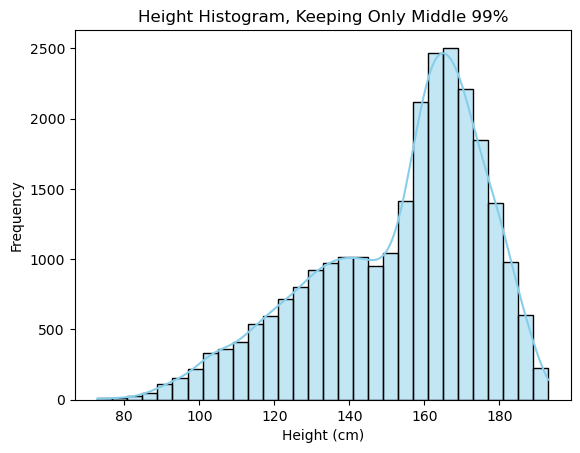

In [69]:
## Height

height_file = "/home/ec2-user/SageMaker/Team-5/data_processing/height_AddBirthYear.csv"
height = pd.read_csv(height_file)

print(height.describe())

## Converting all heights to cm
height['Height_cm15'] = height['Heightcm'].fillna(height['Heightcm_dup15'])
height['Height_cm16'] = height['Height_cm15'].fillna(height['Heightcm_dup16'])
height['Height_cm21'] = height['Height_cm16'].fillna(height['Heightcm_dup21'])
height['Height_cm'] = height['Height_cm21'].fillna(height['Heightcm_dup22'])

height['Height_in15'] = height['Heightin'].fillna(height['Heightin_dup15'])
height['Height_in16'] = height['Height_in15'].fillna(height['Heightin_dup16'])
height['Height_in21'] = height['Height_in16'].fillna(height['Heightin_dup21'])
height['Height_in'] = height['Height_in21'].fillna(height['Heightin_dup22'])

height['in_to_cm'] = height['Height_in'] * 2.53999863
height['all_heights_cm'] = height['Height_cm'].fillna(height['in_to_cm'])

## Remove columns used to manipulate data
columns_to_keep = ['Unnamed: 0', 'MaskID', 'Visit_Dt', 'BirthYear_dup21', 'all_heights_cm']
height = height[columns_to_keep]

## Printing info about data now that it's all converted
print("-----------------------------------------------------------")
print(height.describe())
print("-----------------------------------------------------------")
print(height.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(height.quantile(0.005, numeric_only=True))
print("-----------------------------------------------------------")

## Set perecentile cutoffs and drop rows outside range
upper_cutoff_height = height['all_heights_cm'].quantile(0.995)
lower_cutoff_height = height['all_heights_cm'].quantile(0.005)

## Rename column
height = height.rename(columns={'BirthYear_dup21': 'BirthYear'})

## Add column indicating whether value is within middle 99%
height['within_middle_99_percent'] = (
    (height['all_heights_cm'] >= lower_cutoff_height) & 
    (height['all_heights_cm'] <= upper_cutoff_height)
)

## Print table
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
display(height)

## Exporting file before manipulating further for the plot
height.to_csv('Height_clean.csv', index=False)

## Plotting only the middle 99%
height = height.drop(height[height.all_heights_cm > upper_cutoff_height].index)
height = height.drop(height[height.all_heights_cm < lower_cutoff_height].index)

sns.histplot(height['all_heights_cm'], bins=30, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height Histogram, Keeping Only Middle 99%')
 
# Display the plot
plt.show()

          Unnamed: 0         MaskID  BirthYear_dup21     Weightkg   Weightlbs  \
count   28367.000000   28367.000000       115.000000  6423.000000  882.000000   
mean   345823.226531  596410.581909      1984.260870    49.735718  119.384683   
std     81836.857959  232119.293420        11.824066    28.759510   65.845646   
min       368.000000  200143.000000      1951.000000     0.000000    0.000000   
25%    359433.500000  395836.000000      1981.000000    25.900000   61.600000   
50%    366834.000000  595414.000000      1988.000000    45.000000  114.000000   
75%    374333.500000  796311.000000      1991.000000    67.700000  162.900000   
max    400856.000000  999987.000000      2010.000000   665.000000  631.000000   

       Weightkg_dup15  Weightlbs_dup15  Weightkg_dup16  Weightlbs_dup16  \
count    19471.000000      2296.000000      485.000000        30.000000   
mean        62.463071       139.566004       62.710722       138.747333   
std        423.863819        61.349800       

,Unnamed: 0,MaskID,Visit_Dt,BirthYear,all_weights_kg,within_middle_99_percent
0,368,207335,07/31/2013,NaN,33.8,True
1,956,217759,12/14/2017,NaN,54.1,True
2,1098,220235,05/06/2016,NaN,25.0,True
3,1270,222906,06/25/2012,NaN,79.4,True
4,2266,240847,04/26/2012,NaN,51.3,True
...,...,...,...,...,...,...
28362,400852,973388,06/29/2015,NaN,43.3,True
28363,400853,984458,05/12/2008,NaN,65.5,True
28364,400854,987665,07/15/2015,NaN,32.0,True
28365,400855,993366,05/04/2015,NaN,21.9,True


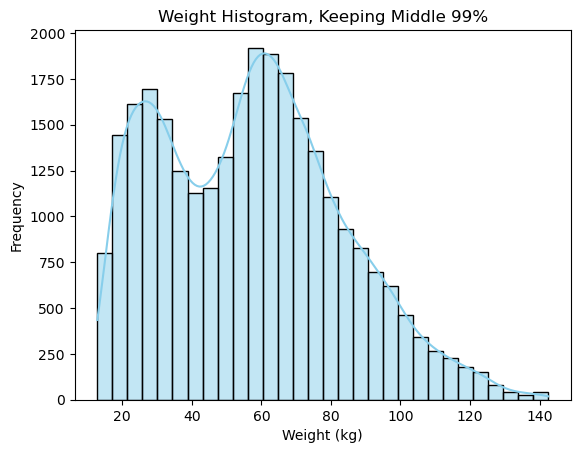

In [68]:
## Weight

weight1_file = "/home/ec2-user/SageMaker/Team-5/data_processing/weight_1_AddBirthYear.csv"
weight1 = pd.read_csv(weight1_file)

print(weight1.describe())

weight1['Weight_kg15'] = weight1['Weightkg'].fillna(weight1['Weightkg_dup15'])
weight1['Weight_kg16'] = weight1['Weight_kg15'].fillna(weight1['Weightkg_dup16'])
weight1['Weight_kg21'] = weight1['Weight_kg16'].fillna(weight1['Weightkg_dup21'])
weight1['Weight_kg'] = weight1['Weight_kg21'].fillna(weight1['Weightkg_dup22'])

weight1['Weight_lbs15'] = weight1['Weightlbs'].fillna(weight1['Weightlbs_dup15'])
weight1['Weight_lbs16'] = weight1['Weight_lbs15'].fillna(weight1['Weightlbs_dup16'])
weight1['Weight_lbs21'] = weight1['Weight_lbs16'].fillna(weight1['Weightlbs_dup21'])
weight1['Weight_lbs'] = weight1['Weight_lbs21'].fillna(weight1['Weightlbs_dup22'])


weight1['lbs_to_kg'] = weight1['Weight_lbs'] * 0.45359237
weight1['all_weights_kg'] = weight1['Weight_kg'].fillna(weight1['lbs_to_kg'])

## Remove columns used to manipulate data
columns_to_keep = ['Unnamed: 0', 'MaskID', 'Visit_Dt', 'BirthYear_dup21', 'all_weights_kg']
weight1 = weight1[columns_to_keep]

## Printing info about data now that it's all converted
print(weight1.describe())
print("-----------------------------------------------------------")
print(weight1.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(weight1.quantile(0.005, numeric_only=True))

## Set perecentile cutoffs and drop rows outside range
upper_cutoff_weight1 = weight1['all_weights_kg'].quantile(0.995)
lower_cutoff_weight1 = weight1['all_weights_kg'].quantile(0.005)

## Rename column
weight1 = weight1.rename(columns={'BirthYear_dup21': 'BirthYear'})

## Add column indicating whether value is within middle 99%
weight1['within_middle_99_percent'] = (
    (weight1['all_weights_kg'] >= lower_cutoff_weight1) & 
    (weight1['all_weights_kg'] <= upper_cutoff_weight1)
)

## Print table
display(weight1)

## Exporting file before manipulating further for the plot
weight1.to_csv('Weight1_clean.csv', index=False)

## Plotting only the middle 99%
weight1 = weight1.drop(weight1[weight1.all_weights_kg > upper_cutoff_weight1].index)
weight1 = weight1.drop(weight1[weight1.all_weights_kg < lower_cutoff_weight1].index)

## Plot histogram
sns.histplot(weight1['all_weights_kg'], bins=30, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

          Unnamed: 0         MaskID  f1availableWeightWeight  \
count      46.000000      46.000000                46.000000   
mean   381505.326087  624924.956522                70.436957   
std     74372.705744  218262.527757                57.227493   
min     24777.000000  243158.000000               -10.000000   
25%    398865.500000  437730.250000                34.375000   
50%    398955.000000  636900.500000                50.900000   
75%    399073.750000  816145.750000                97.600000   
max    399136.000000  960990.000000               230.000000   

       f2availableWeightWeight  f3availableWeightWeight  
count                44.000000                11.000000  
mean                 69.184773                61.295455  
std                  57.326270                54.541610  
min                   0.000000                13.500000  
25%                  30.450000                35.950000  
50%                  49.550000                39.150000  
75%              

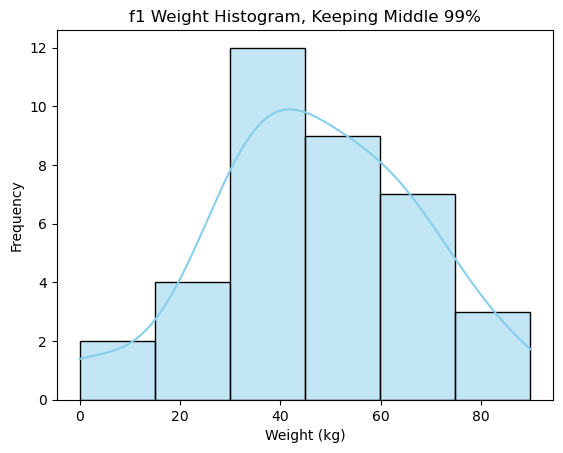

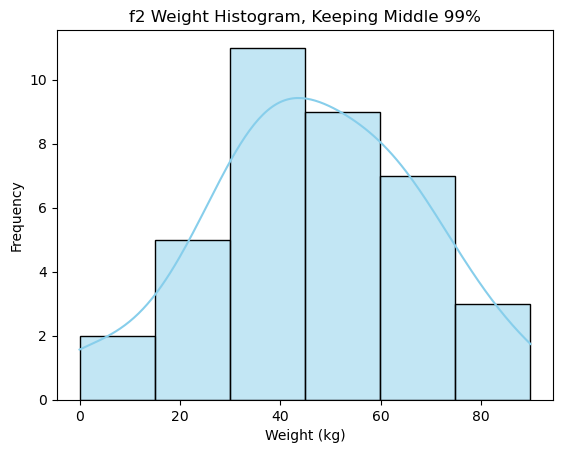

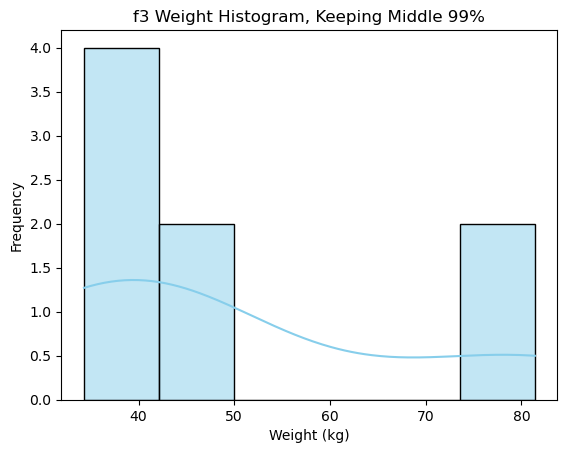

,Unnamed: 0,MaskID,Visit_Dt,f1_weight_units,f1_weightkg,f2_weight_units,f2_weightkg,f3_weight_units,f3_weightkg
0,24777,657216,07/30/2018,143.5lbs,65.090505,137.5lbs,65.090505,nannan,NaN
1,49730,332751,11/22/2019,106.5nan,NaN,nannan,NaN,nannan,NaN
2,383384,289931,08/19/2019,41.1Kg,41.100000,42.5Kg,41.100000,nannan,NaN
3,385020,367910,01/08/2020,59.0Kg,59.000000,56.0Kg,59.000000,nannan,NaN
4,386398,435150,12/09/2019,78.7Kg,78.700000,76.5Kg,78.700000,77.4Kg,78.7
...,...,...,...,...,...,...,...,...,...
41,399110,899638,05/18/2020,39.8Kg,39.800000,39.7Kg,39.800000,nannan,NaN
42,399118,914084,01/10/2019,37.7Kg,37.700000,37.7Kg,37.700000,nannan,NaN
43,399120,922593,11/01/2018,58.9Kg,58.900000,52.1Kg,58.900000,nannan,NaN
44,399126,930766,06/17/2020,18.7Kg,18.700000,13.0Kg,18.700000,nannan,NaN


In [77]:
## Available Weight

weight2_file = "/home/ec2-user/SageMaker/Team-5/data_processing/weight_2_availableWeight.csv"
weight2 = pd.read_csv(weight2_file)

# Describe and check quantiles
print(weight2.describe())
print("-----------------------------------------------------------")
print(weight2.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(weight2.quantile(0.005, numeric_only=True))

# Combine weight and units columns
for col in ['f1', 'f2', 'f3']:
    weight2[f'{col}_weight_units'] = weight2[f'{col}availableWeightWeight'].astype(str) + weight2[f'{col}availableWeightUnits'].astype(str)
    del weight2[f'{col}availableWeightWeight']
    del weight2[f'{col}availableWeightUnits']

    # Convert lbs to kg
    weight2[f'{col}_weightkg'] = pd.to_numeric(weight2[weight2[f'{col}_weight_units'].str.contains('lbs')]['f1_weight_units'].str[:-3], errors='coerce') * 0.45359237

    # Convert kg
    weight2[f'{col}_weightkg'].fillna(pd.to_numeric(weight2[weight2[f'{col}_weight_units'].str.contains('Kg')]['f1_weight_units'].str[:-2], errors='coerce'), inplace=True)

# Create cutoffs
cutoffs = {
    'f1': (weight2['f1_weightkg'].quantile(0.005), weight2['f1_weightkg'].quantile(0.995)),
    'f2': (weight2['f2_weightkg'].quantile(0.005), weight2['f2_weightkg'].quantile(0.995)),
    'f3': (weight2['f3_weightkg'].quantile(0.005), weight2['f3_weightkg'].quantile(0.995)),
}

# Drop outside the range
for col in ['f1', 'f2', 'f3']:
    weight2 = weight2.drop(weight2[(weight2[f'{col}_weightkg'] > cutoffs[col][1]) | (weight2[f'{col}_weightkg'] < cutoffs[col][0])].index)

# Plot histograms
for col in ['f1', 'f2', 'f3']:
    sns.histplot(weight2[f'{col}_weightkg'], bins=6, kde=True, color='skyblue', edgecolor='black')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    plt.title(f'{col} Weight Histogram, Keeping Middle 99%')
    plt.show()

# Display cleaned data
display(weight2)

# Save to CSV
weight2.to_csv('Weight2_clean.csv', index=False)